# Intro to ML &  Decision Trees

## Welcome

Welcome to Bait 509 - Business Application of Machine Learning!

```{note}
Buckle up because there are going to be a lot of new concepts here but in the lyrics of Trooper "We're here for a good time, 
Not a long time". 
```

### Course Learning Objectives

1.	Describe fundamental machine learning concepts such as: supervised and unsupervised learning, regression and classification, overfitting, training/validation/testing error, parameters and hyperparameters, and the golden rule.
2.	Broadly explain how common machine learning algorithms work, including: naïve Bayes, k-nearest neighbors, decision trees, support vector machines, and logistic regression.
3.	Identify when and why to apply data pre-processing techniques such as scaling and one-hot encoding.
4.	Use Python and the scikit-learn package to develop an end-to-end supervised machine learning pipeline.
5.	Apply and interpret machine learning methods to carry out supervised learning projects and to answer business objectives.

### Python, Jupyter, Visualizations 

- In this course we be using Python and Jupyter notebooks for lectures as well as assignments. 
- I recommend using the [Miniconda distribution](https://docs.conda.io/en/latest/miniconda.html) to install and manage your Python package installations, but you are free to use either Anaconda or pip if you prefer that.
- If you are using Miniconda or Anaconda, you can install a few key packages we will be using in the course, by typing the following at the command line (the "Anaconda prompt" on Windows, and the default terminal application on MacOS/Linux):
    > `conda install xgboost jupyter altair_saver seaborn`

- Otherwise you can use pip and type the following at the command line: 
    > `pip install xgboost jupyter altair_saver seaborn`

- Some packages that we will make heavy use of are installed together with the packages above, most notably `pandas`, `numpy`, `matplotlib`, and `scikit-learn`.


- We will be making visualizations for this course and I give the option of plotting using any Python library (e.g. matplotlib, seaborn, pandas, altair, etc.) but I strongly recommend getting familiar with [`altair`](https://altair-viz.github.io/index.html). I have 2 very quick slide decks that teach you a bit about how to plot using `altair`. 
From the course [Programming in Python for Data Science](https://prog-learn.mds.ubc.ca/en/)
    - Module 1, exercise 31, 32, 33
    - Module 2, exercise 29, 30
    - And if you want to dive further there is a whole course dedicated to visualizing plots using `altair` called [Data Visualization](https://viz-learn.mds.ubc.ca/en/).

### Lecture Learning Objectives

Don't worry if some of these terms don't make sense up front, they will after we have covered them during today's lecture.

- Explain motivation to study machine learning.
- Differentiate between supervised and unsupervised learning.
- Differentiate between classification and regression problems.
- Explain machine learning terminology such as features, targets, training, and error.
- Explain the `.fit()` and `.predict()` paradigm and use `.score()` method of ML models.
- Broadly describe how decision trees make predictions.
- Use `DecisionTreeClassifier()` and `DecisionTreeRegressor()` to build decision trees using scikit-learn.
- Explain the difference between parameters and hyperparameters.
- Explain how decision boundaries change with `max_depth`.

## What is Machine Learning (ML)?

Machine learning is all around us. You can find it in things like: 


![](imgs/examples.png)


- Voice assistance
- Google news
- Recommender systems
- Face recognition
- Auto completion
- Stock market predictions
- Character recognition
- Self-driving cars
- Cancer diagnosis
- Drug discovery

Machine Learning can mean many different things to different people. In this course, we will stick to how it is defined in the seminal textbook ["Introduction to Statistical Learning"](https://www.statlearning.com/) which defines Statistical/Machine Learning as a "*set of tools for making sense of complex datasets*". As you can hear, this is still rather broad, and we will refine our understanding throughout this course. Let's start right now by looking at some specific examples of Machine Learning problems.

## Types of Machine Learning

- **Supervised learning** (this course)
- Unsupervised learning

### Supervised Learning: 

> Example: Labelling emails as spam or not

- In supervised machine learning, we have a set of observations usually denoted with an uppercase `X`.
- We also have a set of corresponding targets usually denoted with a lowercase `y`. 
- Our goal is to define a function that relates `X` to `y`. 
- We then use this function to predict the targets of new examples. 

<br>
<br>

<img src='imgs/sup-learning.png'  width = "75%" alt="404 image" />


### UnSupervised Learning: (not going into detail here)  

> Example: Categorizing Google News articles.


- In unsupervised learning, we are not given target labels and are instead only given observations `X`. 
- We apply an algorithm to try find patterns/structure in our data and divide the observations into groups/clusters that share similar characteristics from our data.
- E.g. it could be that we want find out if there are groups of business that operate similarly based a few key business metrics. We might not know up front how many groups there are in the data, and an unsupervised clustering algorithm could help us understand if there e.g. are two very distinct set of strategies that business employ (two clusters), or if there is a big mix and no clear structure at all in our data.
- Another example can be seen below, we might get input images of cats and dogs and ask the algorithm to cluster them together based on any property that can be extracted from the images (color, size, shapes, etc).


<img src='imgs/unsup-learning.png'  width = "75%" alt="404 image" />

## Types of Supervised Learning: Classification vs Regression

- Classification
- Regression

### Classification

**Classification** predicting among two or more categories, also known as classes.
- *Example1*: Predict whether a customer will default on their credit card or not. 
- *Example2*: Predict whether a student would get an A+ or not in a project.
    

### Regression

**Regression** predicting a continuous (in other words, a number) value.
- Example1: Predict housing prices
- Example2: Predict a student’s score in a project.
    
    
<img src="imgs/classification-vs-regression2.png" width = "90%" alt="404 image" />


**Example 1: Credit card fraud detection data set**

In this example, we are trying to predict whether a person is likely to default (class = 1) or not (class = 0) on their credit card given a bunch of input features. 

In [2]:
import pandas as pd

classification_df = pd.read_csv("data/creditcard_sample.csv").sample(10_000, random_state=390)
classification_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77244,148572.0,-2.192803,-1.184063,-0.587411,-0.624137,2.856276,-2.058827,0.253898,-0.361502,0.473344,...,-0.006427,0.627750,-0.634097,0.693558,-0.258117,-0.753612,0.538571,0.305432,94.47,0
112513,97024.0,-1.958810,0.992661,0.229305,3.158607,2.590061,-1.197520,1.031590,0.102072,-1.639767,...,0.300789,0.423192,-0.680045,1.130778,1.439294,0.377042,-0.209320,-0.242601,1.51,0
98163,138463.0,0.123289,1.079440,-0.466330,-0.420373,1.105829,-0.739383,1.156067,-0.392044,-0.146092,...,0.270423,1.183270,-0.297665,-0.437083,-0.337571,-0.177253,0.097323,-0.046671,8.39,0
16889,148014.0,2.205836,0.170743,-2.480998,-0.183286,1.001373,-1.222709,0.852123,-0.604090,0.151221,...,0.089298,0.454132,-0.180294,-0.921876,0.604957,0.300060,-0.082035,-0.087539,3.85,0
30631,168840.0,-1.233511,-0.769039,-0.311892,-0.751171,-0.212926,-0.962064,0.092553,0.402238,-1.286992,...,0.290688,0.833095,0.186440,-0.007625,-0.434240,-0.080610,0.320599,0.074183,147.50,0


**Example 2: Predict housing sale price**

In this example, we are trying to predict the sale price of a house given its features such as number of bedroom, number of bathrooms, sqft, etc. 

In [3]:
regression_df = pd.read_csv("data/kc_house_data.csv").drop(columns=["id", "date"])
regression_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Let's Practice

**Are the following supervised or unsupervised problems?**   

1\. Finding groups of similar properties in a real estate data set.   
2\. Predicting real estate prices based on house features like number of rooms, learning from past sales as examples.    
3\. Identifying groups of animals given features such as "number of legs", "wings/no wings", "fur/no fur", etc.    
4\. Detecting heart disease in patients based on different test results and history.    
5\. Grouping articles on different topics from different news sources (something like Google News app).    

**Are the following classification or regression problems?**   

6\. Predicting the price of a house based on features such as number of rooms and the year built.    
7\. Predicting if a house will sell or not based on features like the price of the house, number of rooms, etc.     
8\. Predicting your grade in BAIT 509 based on past grades.     
9\. Predicting whether you should bicycle tomorrow or not based on the weather forecast.     
10\. Predicting a cereal’s manufacturer given the nutritional information.     

```{admonition} Solutions!
:class: dropdown
1. Unsupervised
2. Supervised
3. Unsupervised
4. Supervised
5. Unsupervised
6. Regression
7. Classification
8. Regression
9. Classification
10. Classification 
```

## Tabular Data and Terminology

Basic terminology used in ML:

- **examples/observations** = rows 
- **features/variables** = inputs (columns)
- **targets** = outputs (one special column)
- **training** = learning = fitting

<img src="imgs/sup-ML-terminology2.png" width = "90%" alt="404 image" />


### Example:

- This [dataset](http://simplemaps.com/static/demos/resources/us-cities/cities.csv) contains longtitude and latitude data for 400 cities in the US.
- Each city is labelled as `red` or `blue` depending on how they voted in the 2012 election.

In [4]:
df = pd.read_csv('data/cities_USA.csv', index_col=0).sample(12, random_state=89)
df

,lon,lat,vote
146,-82.155358,38.008878,blue
33,-92.744478,31.226442,blue
389,-96.505225,47.070528,red
297,-87.964364,42.159843,red
230,-88.137965,40.374736,red
292,-87.686544,42.030220,red
91,-92.787976,35.042732,blue
198,-80.305106,39.702072,blue
369,-92.697108,45.321757,red
392,-101.189807,47.460163,blue


In [5]:
df.shape

(12, 3)

In this dataset, we have:
- 2 **features**, (3 columns = 2 **features** + 1 target) and,
- 20 **examples**.

Our **target** column is `vote` since that is what we are interesting in predicting. 

## Decision Tree Algorithm

### A conceptual introduction to Decision Trees

Shown below is some hypothetical data with 2 features (x and y axes) and 1 target (with 2 classes).   
The supervised learning problem here is to predict whether a particular observaton belongs to the <font color='blue'>**BLUE**</font> or <font color='orange'>**ORANGE**</font> class.    
A fairly intuitive way to do this is to simply use thresholds to split the data up.

<img src='imgs/scatter_dt1.png'  width = "40%" alt="404 image" />

For example, we can **split** the data at `Feature_1 = 0.47`.   
Everything **less than** the split we can classify as <font color='orange'>**ORANGE**</font>.  
Everything **greater than** the split we can classify as <font color='blue'>**BLUE**</font>.   
By this method, we can successfully classify 7 / 9 observations.

<img src='imgs/scatter_dt2.png'  width = "40%" alt="404 image" />

But we don't have to stop there, we can make another split!   
Let's now split the section that is greater than `Feature_1 = 0.47`, using `Feature_2 = 0.52`.
We now have the following conditions:    
- If `Feature_1 > 0.47` and `Feature_2 < 0.52` classify as <font color='blue'>**BLUE**</font>.    
- If `Feature_1 > 0.47` and `Feature_2 > 0.52` classify as <font color='orange'>**ORANGE**</font>.    

Using these rules, we now successfully classify 8 / 9 observations.  

<img src='imgs/scatter_dt3.png'  width = "40%" alt="404 image" />

Okay, let's add one more threshhold.    
Let's make a final split of the section that is less than `Feature_1 = 0.47`, using `Feature_2 = 0.6`.   
By this methodology we have successfully classified all of our data.   

<img src='imgs/scatter_dt4.png'  width = "40%" alt="404 image" />

What we've really done here is create a group of `if` statements:     
- If `Feature_1 < 0.47` and `Feature_2 < 0.6` classify as <font color='orange'>**ORANGE**</font>
- If `Feature_1 < 0.47` and `Feature_2 > 0.6` classify as <font color='blue'>**BLUE**</font>
- If `Feature_1 > 0.47` and `Feature_2 < 0.52` classify as <font color='blue'>**BLUE**</font>
- If `Feature_1 > 0.47` and `Feature_2 > 0.52` classify as <font color='orange'>**ORANGE**</font>

This is easier to visualize as a tree:

<img src='imgs/toy_tree.png'  width = "40%" alt="404 image" />

We just made our first decision tree!

Before we go forward with learning about decision tree classifiers and reggressors we need to understand the structure of a decision tree.
Here is the key terminology that you will have to know: 

- **Root**: Where we start making our conditions.
- **Branch**:  A branch connects to the next node (statement). Each branch represents either true or false.
- **Internal node**: conditions within the tree.  
- **Leaf**: the value predicted from the conditions. 
- **Tree depth**: The longest path from the root to a leaf.

With the decision tree algorithm in machine learning, the tree can have at most two nodes resulting from it, also known as children.

If a tree only has a depth of 1, we call that a **decision stump**.

<img src="imgs/lingo_tree.png"  width = "55%" alt="404 image">

This tree  and the one in our example above, both have a depth of 2.

Trees do not need to be balanced. (You'll see this shortly)

### Implimentation with Scikit-learn

Steps to train a classifier using sklearn:

1. Read the data
2. Create $X$ and $y$
3. Create a classifier object
4. fit the classifier
5. predict on new examples
6. score the model

#### 1. Read the data

In [15]:
df = pd.read_csv('data/cities_USA.csv', index_col=0).sample(12, random_state=89)
df.head()

,lon,lat,vote
146,-82.155358,38.008878,blue
33,-92.744478,31.226442,blue
389,-96.505225,47.070528,red
297,-87.964364,42.159843,red
230,-88.137965,40.374736,red


#### 2. Create $X$ and $y$


Before we build any model (we are getting to that so hang tight), we need to make sure we have the right "parts" aka inputs and outputs. 

That means we need to split up our tabular data into the features and the target, also known as $X$ and $y$.

$X$ is all of our features in our data, which we also call our ***feature table***. <br>
$y$ is our target, which is what we are predicting.

In [16]:
X = df.drop(columns=["vote"])
y = df["vote"]

In [17]:
X.head()

,lon,lat
146,-82.155358,38.008878
33,-92.744478,31.226442
389,-96.505225,47.070528
297,-87.964364,42.159843
230,-88.137965,40.374736


In [18]:
y.head()

146    blue
33     blue
389     red
297     red
230     red
Name: vote, dtype: object

#### 3. Create a classifier object

- import the appropriate classifier
- Create an object of the classifier

There are several machine learning libraries available to use but for this course, we will be using the  Scikit-learn (hereafter, referred to as sklearn) library, which is a popular (41.6k stars on Github) Machine Learning library for Python.


- We generally import a particular ML algorithm using the following syntax:
> `from sklearn.module import algorithm`

The decision tree classification algorithm (`DecisionTreeClassifier`) sits within the `tree` module.  
(Note there is also a Decision Tree Regression algorithm in this module which we'll come to later...)  
Let's import the classifier using the following code:  

In [19]:
from sklearn.tree import DecisionTreeClassifier

We can begin creating a model by instantiating an instance of the algorithm class.    
Here we are naming our decision tree model `model`:   

In [20]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

At this point we just have the framework of a model.    
We can't do anything with our algorithm yet, because it hasn't seen any data!     
We need to give our algorithm some data to learn/train/fit a model.    

#### 4. Fit the classifier

We can now use the `.fit()` method to train our model using the feature `X` and target `y` data we just separated.  
When we call fit on our model object, the actual learning happens. 

In [21]:
model.fit(X, y)

DecisionTreeClassifier()

Now we've used data to learn a model, let's take a look at the model we made!    
The code below prints out our model structure for us (like the tree we made ourselves earlier)   

The way to read the decision tree visualization below
is that if the condition on top of a box is true,
then you follow the left arrow and if it is false you follow the right arrow.
`samples` indicated how many observations there are in the node
and `values` how many of those are `[blue, red]`.
The class of each node indicated what class most samples in that node belong to.
Note that you need to make sure that the feature and class names are passed in the correct order,
and the best way to do this is to crosscheck with the next plot we will make,
but for now you can rely on that I have put these in the expected order.

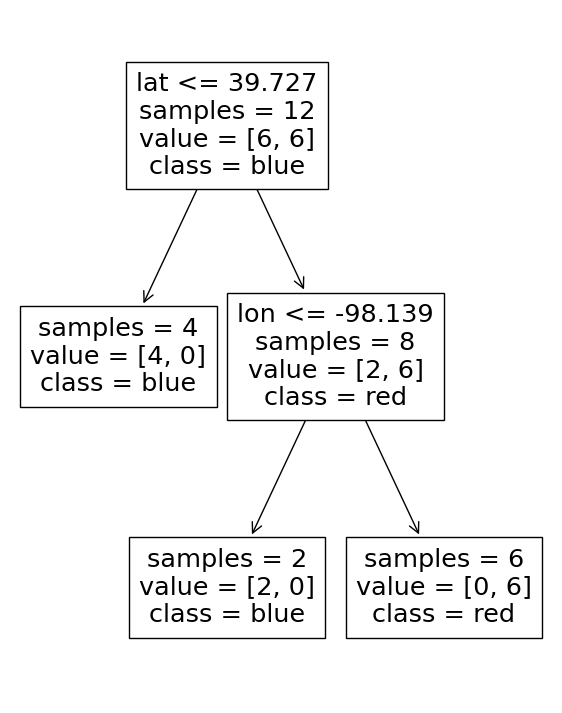

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plot_tree(
    model,
    feature_names=X.columns,
    class_names=y.unique(),
    impurity=False,
    ax=plt.subplots(figsize=(7, 9))[1]  # We need to create a figure to control the overall plot size
);

We can better visualize what's going on by actually plotting our data and the model's  **decision boundaries**.

In [26]:
# import a custom function

import os
import sys
sys.path.append(os.path.join(os.path.abspath("."), "code"))
from plotting_functions import *
from utils import *

/Users/quannguyen/opt/miniconda3/envs/571/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


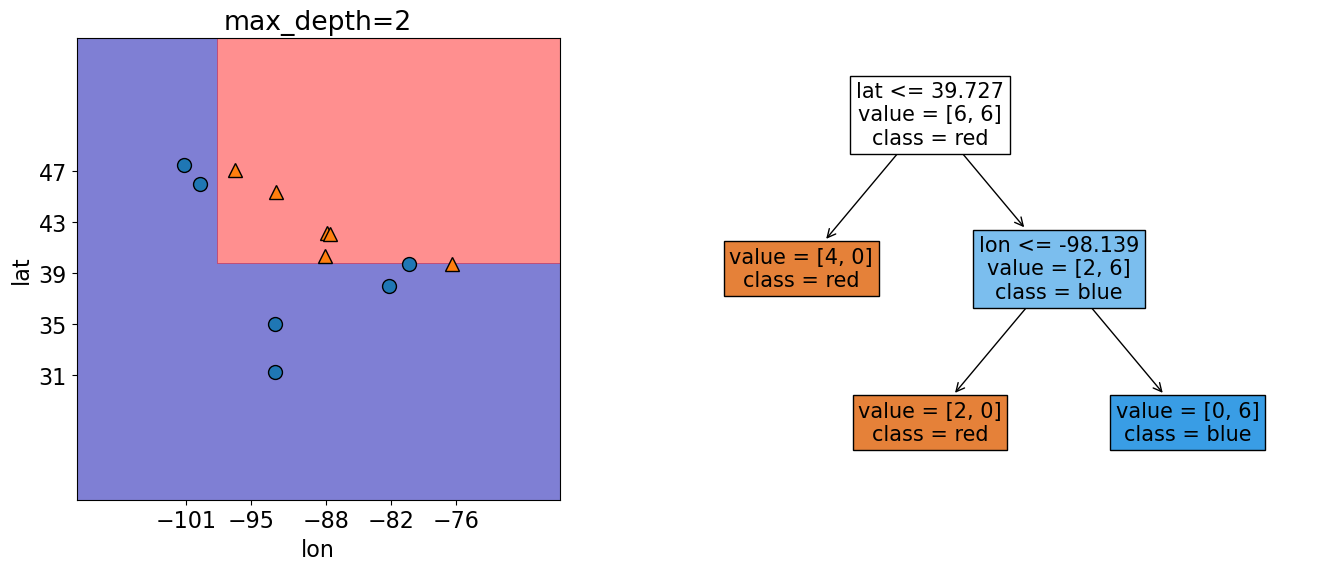

In [27]:
plot_tree_decision_boundary_and_tree(
    model,
    X,
    y,
    height=6,
    width=16,
    fontsize=15,
    eps=10,
    x_label="lon",
    y_label="lat",
)

In this plot the shaded regions show what our model predicts for different feature values.  
The scatter points are our actual 20 observations.    
From the above plot, we can see that our model is classifying all our observations correctly, but there's an easier way to find out how our model is doing.   


```{admonition} How does .fit() work?
:class: note

Or "How does do Decision Trees decide what values to split on?"

We will not go into detail here,
but in general the algorithm is trying to maximize the homogeneity of the target variable
within each of the groups created from a split.
In other words,
observations on the left of a split should all be similar to each other
and observation on the right of the split should all be similar to each other.

There are different ways to measure similarity between observations
and some of the most common metrics include:

- Gini Index
- Information gain
- Cross entropy 

You can read more about these metrics [here](https://en.wikipedia.org/wiki/Decision_tree_learning#Metrics)
```

#### 5. Predict the target using unseen data

We can predict the target of examples by calling `.predict()` on the classifier object.     
Let’s see what it predicts for a single randomly new observation first:

In [28]:
new_ex = [-87.4, 59]
new_example = pd.DataFrame(data=[new_ex], columns=["lon", "lat"])
new_example

,lon,lat
0,-87.4,59


In [29]:
model.predict(new_example)

array(['red'], dtype=object)

we get a prediction of `red` for this example!

We can also predict on our whole feature table - Here, we are predicting on all of X.

In [30]:
model.predict(X)

array(['blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red',
       'blue', 'blue', 'red'], dtype=object)

In [31]:
pd.DataFrame({'true_values' : y.to_numpy(), 'predicted' : model.predict(X)})

,true_values,predicted
0,blue,blue
1,blue,blue
2,red,red
3,red,red
4,red,red
5,red,red
6,blue,blue
7,blue,blue
8,red,red
9,blue,blue


How does `.predict()` work?

For us to see how our algorithm predicts for each example, all we have to do is return to our Decision Tree. 

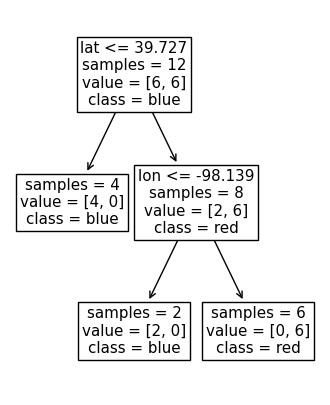

In [32]:
plot_tree(
    model,
    feature_names=X.columns,
    class_names=y.unique(),
    impurity=False,
    ax=plt.subplots(figsize=(4, 5))[1]
);

Let's use our `new_example` object for this example.

In [ ]:
new_example

,lon,lat
0,-87.4,59


- First we start at the root.
- Is `lat` <= 39.727? False, so we go down the right branch.
- Is `lon` <= -98.139? False , so we go down the right branch.
- and arrive at red!

Let's check this using predict again. 

In [ ]:
model.predict(new_example)

array(['red'], dtype=object)

Nice!

#### 6. Score the model

- How do you know how well your model is doing?
- For classification problems, by default, `score` gives the **accuracy** of the model, i.e., proportion of correctly predicted targets.  

    $accuracy = \frac{\text{correct predictions}}{\text{total examples}}$   

In [21]:
print("The accuracy of the model on the training data: %0.3f" % (model.score(X, y)))

The accuracy of the model on the training data: 1.000



Sometimes we will also see people reporting **error**, which is usually 1 - accuracy. 

Our model has an accurary of 100% (or 0% error)!

In [22]:
print(
    "The error of the model on the training data: %0.3f" % (1 - model.score(X, y))
)

The error of the model on the training data: 0.000


## Let's Practice

Using the data `candybars.csv` from the datafolder to aswer the following questions:  

1\. How many features are there?    
2\. How many observations are there?     
3\. What would be a suitable target with this data?    

In [30]:
candy_df = pd.read_csv('data/candybars.csv', index_col=0)
candy_df

,chocolate,peanuts,caramel,nougat,cookie_wafer_rice,coconut,white_chocolate,multi,availability
candy bar,,,,,,,,,
CoffeeCrisp,1,0,0,0,1,0,0,0,Canada
Butterfinger,1,1,1,0,0,0,0,0,America
Skor,1,0,1,0,0,0,0,0,Both
Smarties,1,0,0,0,0,0,0,1,Canada
Twix,1,0,1,0,1,0,0,1,Both
ReesesPeanutButterCups,1,1,0,0,0,0,0,1,Both
3Musketeers,1,0,0,1,0,0,0,0,America
Kinder Surprise,1,0,0,0,0,0,1,0,Canada
M&Ms,1,1,0,0,0,0,0,1,Both


In [31]:
candy_df.shape

(25, 9)

**Answer as either `fit`  or `predict`:**   

4. Is called first (before the other one).    
5. Only takes X as an argument.    
6. In scikit-learn, we can ignore its output.
 
**Quick Questions:**   

7. What is the top node in a decision tree called?    
8. What Python structure/syntax are the nodes in a decision tree similar to?    

```{admonition} Solutions!
:class: dropdown
1. 8
2. 25
3. Probably `availability` but we could use the other features as well. 
4. `fit`
5. `predict`
6. `fit`
7. the root
8. if/else conditions
```

## Parameters and Hyperparameters

- ***Parameters***:  Derived during training and automatically set by the model.
- ***Hyperparameters***: Can be set before training by the data scientist to influence how the model sets it parameters.

E.g., we can tell the tree to use a certain metric (a hyperparameter)
to derive the splits at each leaf (the parameters of the model).

### Parameters 

When you call `fit` (the training stage of building your model), **parameters** get set, like the split variables and split thresholds. 


<img src='imgs/parameters.png'  width = "30%" alt="404 image" />
 

### Hyperparameters

But even before calling `fit` on a specific data set, we can set some some "knobs" which that control the learning which are called **hyperparameters**. 

In scikit-learn, hyperparameters are set in the constructor.

`max_depth`is a hyperparameter (of many) that lets us decide and set how "deep" we allow our tree to grow.

Let's practice by making a decision stump (A tree with a depth of 1). Our last model was made where we set the depth to "unlimited" so we need to initial a new model and train a new where where we set the `max_depth` hyperparameter. 

Let's see what the tree looks like now.  

In [32]:
model_1 = DecisionTreeClassifier(max_depth=1).fit(X, y)
model_1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

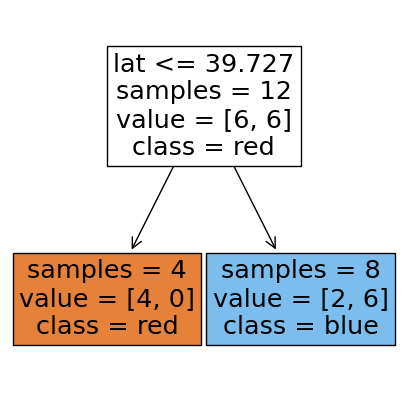

In [36]:
plot_tree(
    model_1,
    feature_names=X.columns,
    class_names=y.unique()[::-1],
    impurity=False,
    filled=True,
    ax=plt.subplots(figsize=(5, 5))[1]
);

We see that it's a depth of one and split on `lat` at 39.727 

- The hyperparameter `max_depth`  is being set by us at 1.
- The parameter `lat` is set by the algorithm at 39.727

We can see the decision boundary at `lat`= 39.727 with the horizontal line in the plot below. 

/Users/quannguyen/opt/miniconda3/envs/571/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


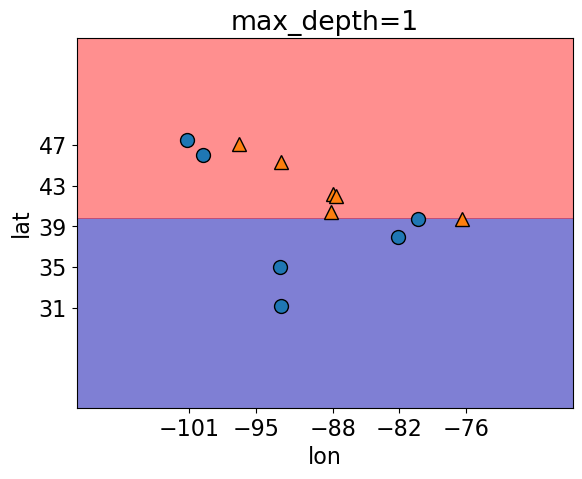

In [43]:
plot_tree_decision_boundary(
    model_1,
    X,
    y,
    eps=10,
    x_label="lon",
    y_label="lat",
)

- Looking  at the score of this model, we get an accuracy of 83%.

In [44]:
model_1.score(X, y)

0.8333333333333334

Let's try growing a more complex tree model and now set `max_depth = 2`

In [25]:
model_2 = DecisionTreeClassifier(max_depth=2).fit(X, y)

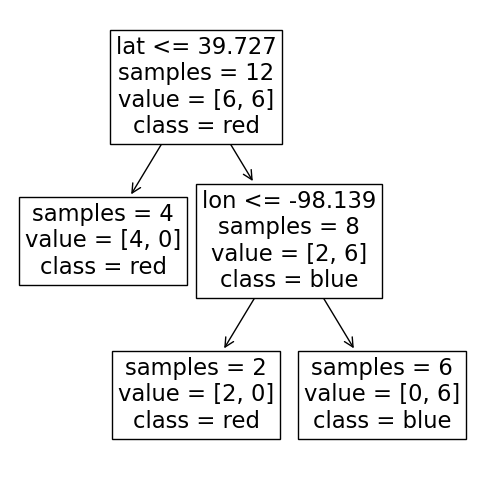

In [26]:
plot_tree(
    model_2,
    feature_names=X.columns,
    class_names=y.unique()[::-1],
    impurity=False,
    ax=plt.subplots(figsize=(6, 6))[1]
);

This has 3 splits in the tree so we expect 3 decision boundaries (2 on `lon` and 1 on `lat`). 

/Users/quannguyen/opt/miniconda3/envs/571/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


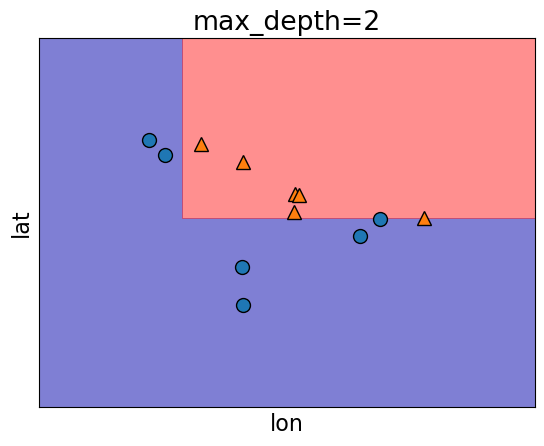

In [27]:
plot_tree_decision_boundary(
    model_2,
    X,
    y,
    eps=10,
    x_label="lon",
    y_label="lat",
)

- Looking at the score of this model now get an accuracy of 100%! 

In [48]:
model_2.score(X, y)

1.0

We see here that as `max_depth` increases, the accuracy of the training data does as well.

Doing this isn’t always the best idea and we’ll explain this a little bit later on.

- This is just one of many other hyperparameters for decision trees that you can explore -> link <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">here</a> There are many other hyperparameters for decision trees that you can explore at the link <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">here</a>.

To summarize this section:
- **parameters** are automatically learned by an algorithm during training
- **hyperparameters** are specified before training

## Decision Tree Regressor 

We saw that we can use decision trees for classification problems but we can also use this decision tree algorithm for regression problems.  

Instead of using Gini impurity (which we briefly mentioned this above), we can use <a href="https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation" target="_blank">some other criteria</a> for splitting. 

(A common one is mean squared error (MSE) which we will discuss shortly)

`scikit-learn` supports regression using decision trees with `DecisionTreeRegressor()` and the `.fit()` and `.predict()` paradigm that is similar to classification.

Let's do an example using the `kc_house_data` we saw in example 1. 

In [78]:
df = pd.read_csv("data/kc_house_data.csv")
df = df.drop(columns=["id", "date"])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [79]:
X = df.drop(columns=["price"])
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
y = df["price"]
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

We can see that instead of predicting a categorical column like we did with `vote` before, our target column is now numeric. 

Instead of importing `DecisionTreeClassifier`, we import `DecisionTreeRegressor`.

We follow the same steps as before and can even set hyperparameters as we did in classification. 

Here, when we build our model, we are specifying a `max_depth` of 3. 

This means our decision tree is going to be constrained to a depth of 3.

In [81]:
from sklearn.tree import DecisionTreeRegressor

depth = 3
reg_model = DecisionTreeRegressor(max_depth=depth, random_state=1)
reg_model.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

Let's look at the tree it produces our leaves used to contain a categorical value for prediction, but this time we see our leaves are predicting numerical values.

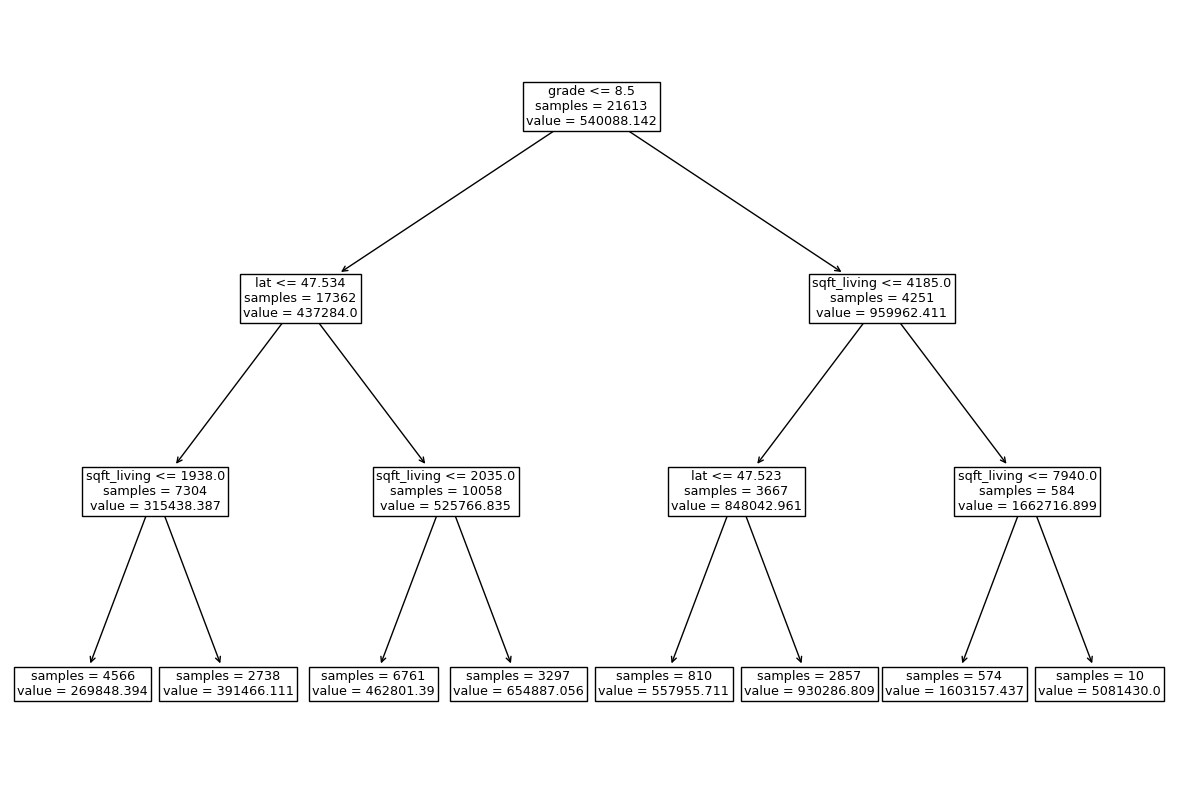

In [82]:
plot_tree(
    reg_model,
    feature_names=X.columns,
    impurity=False,
    ax=plt.subplots(figsize=(15, 10))[1]
);

Let's see what our model predicts for a single example. 

In [83]:
X.loc[[0]]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [84]:
reg_model.predict(X.loc[[0]])

array([269848.39378011])

Our model predicts a housing price of $269848.39 

Should we see what the true value is? 

In [85]:
y.loc[[0]]

0    221900.0
Name: price, dtype: float64

The true value is $221900.0, but how well did it score? 

With regression problems we can't use accuracy for a scoring method so instead when we use `.score()`  it returns somethings called an <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score" target="_blank"> 𝑅2 (r squared) score</a>.

In [86]:
reg_model.score(X,y)

0.6069320183816143

The maximum 𝑅2 is 1 for perfect predictions,
0 means that the same value would be predicted regardless of the input value,
and a negative value would mean that the model is performing worse than outputting a constant value
(e.g. the higher the actual value, the lower the prediction is).

## Let's Practice - Coding 

Using the data `candybars.csv` from the datafolder (or going to exercise 7 [here](https://ml-learn.mds.ubc.ca/en/module2))  for the following:
1. Define two objects named `X` and `y` which contain the features and target column respectively.
2. Using sklearn, create 3 different decision tree classifiers using 3 different `min_samples_split` values based on this data.
3. What is the accuracy of each classifier on the training data?
4. a) Which `min_samples_split` value would you choose to predict this data? <br>
   b) Would you choose the same `min_samples_split` value to predict new data?
5. Do you think most of the computational effort for a decision tree takes place in the `.fit()` stage or `.predict()` stage?

In [6]:
candy_df = pd.read_csv('data/candybars.csv', index_col=0)
candy_df

,chocolate,peanuts,caramel,nougat,cookie_wafer_rice,coconut,white_chocolate,multi,availability
candy bar,,,,,,,,,
CoffeeCrisp,1,0,0,0,1,0,0,0,Canada
Butterfinger,1,1,1,0,0,0,0,0,America
Skor,1,0,1,0,0,0,0,0,Both
Smarties,1,0,0,0,0,0,0,1,Canada
Twix,1,0,1,0,1,0,0,1,Both
ReesesPeanutButterCups,1,1,0,0,0,0,0,1,Both
3Musketeers,1,0,0,1,0,0,0,0,America
Kinder Surprise,1,0,0,0,0,0,1,0,Canada
M&Ms,1,1,0,0,0,0,0,1,Both


**Solutions**

1\.

In [7]:
X = candy_df.drop(columns='availability')
y = candy_df['availability']

2 and 3.

In [8]:
# 2/3.
dt2 = DecisionTreeClassifier(min_samples_split=2)
dt2.fit(X, y)
dt2.score(X, y)

0.84

2 and 3.

In [12]:
# 2/3.
dt5 = DecisionTreeClassifier(min_samples_split=5)
dt5.fit(X, y)
dt5.score(X, y)

0.68

2 and 3.

In [13]:
# 2/3.
dt10 = DecisionTreeClassifier(min_samples_split=10)
dt10.fit(X, y)
dt10.score(X, y)

0.64

4\.

```{toggle}
In this example, the best performance on the training data is given when `min_samples_split=2`.
We don't know if this generalizes best to predicting unseen data,
and to find out we would need to evaluate the different hyperparameter values on a validation data set,
ideally using cross-validation, which we will talk about next lecture.
```

5\.

```{toggle}
The fit stage is more computationally expensive since this is where the optimal feature splits are being computed.
The predict stage is using these already created rules to classify new points.
```

## What We've Learned Today<a id="9"></a>

- What is machine learning (supervised/unsupervised, classification/regression)
- Machine learning terminology
- What is the decision tree algorithm and how does it work
- The scikit-learn library
- Parameters and hyperparameters